In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons

In [2]:
import sys
sys.path.append('..\..') #works on windows

In [3]:
from supervised_learning.decision_tree import DecisionTreeClassifier

In [4]:
plt.rc('font', family='serif')
%matplotlib inline

In [5]:
def plot_decision_regions(X, y, classifier=None, resolution=0.02):
    """ Taken from Rashka's book """
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    x2_min, x2_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    if classifier is not None:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )

<ipython-input-5-150355565b50>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


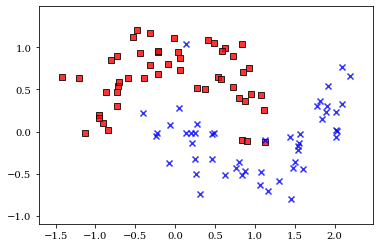

In [6]:
X, y = make_moons(noise=0.2)
plot_decision_regions(X, y)

In [7]:
mytree = DecisionTreeClassifier(max_depth=5, criterion='entropy')
mytree.fit(X, y)

In [8]:
np.mean(mytree.predict(X) == y)

1.0

<ipython-input-5-150355565b50>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


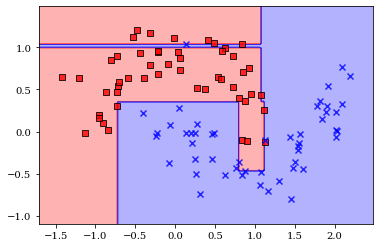

In [9]:
plot_decision_regions(X, y, classifier=mytree)